In [47]:
#Librerias
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [48]:
dataHeartDisese = pd.read_csv('heart_3.csv')
print(dataHeartDisese.columns)
dataHeartDisese.describe()

Index(['Age', 'Sex ', 'Chest Pain ', 'RestingBP', 'Cholesterol', 'FastingBS',
       'Resting ECG', 'MaxHR', 'ExcerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


,Age,Sex,Chest Pain,RestingBP,Cholesterol,FastingBS,Resting ECG,MaxHR,ExcerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


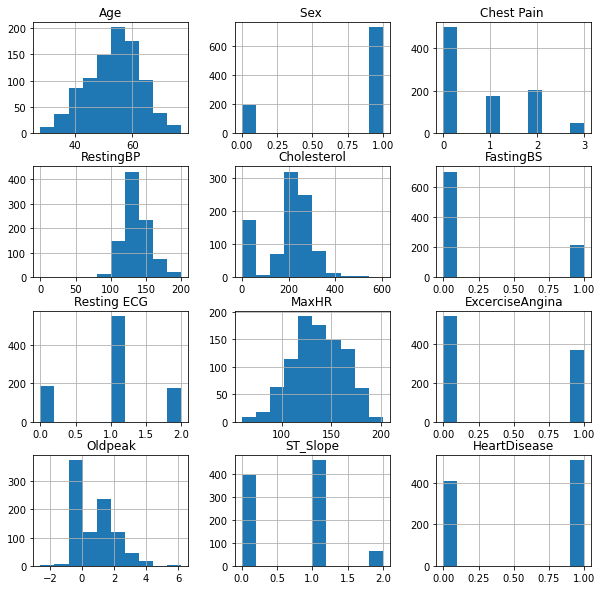

,Age,Sex,Chest Pain,RestingBP,Cholesterol,FastingBS,Resting ECG,MaxHR,ExcerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,0,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,0,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,0,0
5,39,1,2,120,339,0,1,170,0,0.0,0,0
6,45,0,1,130,237,0,1,170,0,0.0,0,0
7,54,1,1,110,208,0,1,142,0,0.0,0,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,0,0


In [49]:
dataHeartDisese.hist(figsize=(10,10))
plt.show()
dataHeartDisese.head(10)

In [50]:
etiqueta = dataHeartDisese.iloc[:,11].values
caracteristicas = dataHeartDisese.iloc[:,:11].values
print(etiqueta.shape)
print(caracteristicas.shape)

(918,)
(918, 11)


In [51]:
car_train,car_test,etiq_train,etiq_test = train_test_split (caracteristicas,etiqueta,test_size=0.2)
print("Train: ",car_train.shape, etiq_train.shape)
print("Test: ",car_test.shape, etiq_test.shape)

Train:  (734, 11) (734,)
Test:  (184, 11) (184,)


In [52]:
# Escalizar los datos 
sc = StandardScaler()
car_train = sc.fit_transform(car_train)
car_test = sc.transform(car_test)

In [60]:

for iter in np.arange(1000,20000,1000):
    clf = LogisticRegression(random_state=0, multi_class='ovr', solver='newton-cg', max_iter=iter)
    clf.fit(car_train, etiq_train)
    clf.predict(car_test)
    clf.predict_proba(car_test)
    print(clf.score(car_test,etiq_test))

0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131


In [61]:
for iter in np.arange(1000,20000,1000):
    clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg', max_iter=iter)
    clf.fit(car_train, etiq_train)
    clf.predict(car_test)
    clf.predict_proba(car_test)
    print(clf.score(car_test,etiq_test))

0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131


In [62]:
for iter in np.arange(1000,20000,1000):
    clf = LogisticRegression(random_state=100, solver='liblinear', max_iter=iter)
    clf.fit(car_train, etiq_train)
    clf.predict_proba(car_test)
    print(clf.score(car_test,etiq_test))

0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
0.8586956521739131
